In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from matplotlib.markers import MarkerStyle
from matplotlib.colors import Normalize

/tmp/ipykernel_56446/1205417597.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Experiment Setup

```
Query 1
ITR: 2 50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950 1000
DVFS: 0c00 0d00 0e00 0f00 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 1a00 
RATE: 100000 200000 300000 400000
NSOURCES: 16
NMAPPERS: 16
NSINKS: 16
```

In [215]:
df_comb = pd.read_csv("mapper16/combined.csv")
#df_comb = df_comb[(df_comb['SourcenumRecordsOutPerSecond_avg']/df_comb['rate']) > 0.95]
df_comb["SourcenumRecordsOutPerSecond_percent"] = 1.0-(df_comb['SourcenumRecordsOutPerSecond_avg']/df_comb['rate'])
df_comb["SourcenumRecordsOutPerSecond_percent"] = df_comb["SourcenumRecordsOutPerSecond_percent"].apply(lambda x: 0.0 if x <= 0.0 else x)
df_comb["ratek"] = df_comb['SourcenumRecordsOutPerSecond_avg']/1000.0
df_comb["itrm"] = df_comb["itr"]/1000.0

def graph(rate, dfo, dfu, dfpo, dfpe, dfs, left=-0.1, right=1.1, metric='SourcenumRecordsOutPerSecond_percent', customl=0):
    plt.rcParams['figure.figsize'] = 6, 4
    plt.rc('axes', labelsize=30)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=30)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=30)    # fontsize of the tick labels

    print(len(dfu[metric].tolist()))
    fig, ax = plt.subplots()

    scatter_c1 = ax.scatter(dfu[metric].tolist(),
                            dfu['pkg_watts_avg'].tolist(), s=400, c=dfu.itrm, edgecolor="black", 
                            cmap='Blues', marker=MarkerStyle("o", fillstyle="right"), label="userspace", alpha=0.8)

    scatter_c2 = ax.scatter(dfu[metric].tolist(),
                            dfu['pkg_watts_avg'].tolist(), s=400, c=dfu.dvfs, edgecolor="black", 
                            cmap='Reds', marker=MarkerStyle("o", fillstyle="left"), alpha=0.8)

    ax.scatter(dfo[metric].tolist(),
                            dfo['pkg_watts_avg'].tolist(), s=400, edgecolor="black", c='lime',
                           marker=MarkerStyle("o"), label="ondemand")
    
    ax.scatter(dfpo[metric].tolist(),
                            dfpo['pkg_watts_avg'].tolist(), s=400, edgecolor="black", c='cyan',
                           marker=MarkerStyle("o"), label="powersave")

    ax.scatter(dfpe[metric].tolist(),
                            dfpe['pkg_watts_avg'].tolist(), s=400, edgecolor="black", c='magenta',
                           marker=MarkerStyle("o"), label="performance")

    ax.scatter(dfs[metric].tolist(),
                            dfs['pkg_watts_avg'].tolist(), s=400, edgecolor="black", c='yellow',
                           marker=MarkerStyle("o"), label="schedutil")
    
    # Add colorbars
    #cbar_c1 = plt.colorbar(scatter_c1, ax=ax, orientation='horizontal', label="ITR (ms)")
    #cbar_c2 = plt.colorbar(scatter_c2, ax=ax, orientation='horizontal', label="DVFS (Ghz)")

    ax.set_xlabel('RPS (K)')
    #ax.set_ylabel('Power (W)')
    ax.set_xlim(left=left, right=right)
    #ax.set_ylim(bottom=40, top=70)

    ax.set_title(f"Query1 @ {int(rate)}K RPS", size=22)
    #plt.legend(fontsize=22, loc='upper left', ncols=5, facecolor='white', framealpha=1.0)
    plt.grid()

    minpow = 9999.0
    for ddf in [dfo, dfpo, dfpe, dfs]:
        print(float(ddf[metric].tolist()[0]))
        if(float(ddf[metric].tolist()[0])/rate > 0.98):
            minpow = min(minpow, float(ddf['pkg_watts_avg'].tolist()[0]))
    print(minpow)
        
    ax.set_box_aspect(0.5) 

    ymin, ymax = ax.get_ylim()
    xmin, xmax = ax.get_xlim()
    print(ymin, ymax)
    print(xmin, xmax)

    xxmin = 9999.0
    latlist = dfu[metric].tolist()
    powlist = dfu['pkg_watts_avg'].tolist()
    for i in range(0, len(latlist)):
        if float(latlist[i])/rate > 0.98:
            xxmin = min(xxmin, float(powlist[i]))
    print(xxmin)
    
    for ddf in [dfo, dfpo, dfpe, dfs]:
        print(float(ddf[metric].tolist()[0]))
        if(float(ddf[metric].tolist()[0])/rate > 0.98):
            minpow = min(minpow, float(ddf['pkg_watts_avg'].tolist()[0]))
    print(minpow)
    
    inset_ax = ax.inset_axes([0.15, 0.55, 0.4, 0.4],  # [x, y, width, height] w.r.t. axes
        ylim=[xxmin, minpow], xlim=[0.95*xmax, xmax], # sets viewport & tells relation to main axes
        xticklabels=[]
    )

    inset_ax.scatter(dfu[metric].tolist(),
                            dfu['pkg_watts_avg'].tolist(), s=100, c=dfu.itrm, edgecolor="black", 
                            cmap='Blues', marker=MarkerStyle("o", fillstyle="right"), label="userspace", alpha=0.8)

    inset_ax.scatter(dfu[metric].tolist(),
                            dfu['pkg_watts_avg'].tolist(), s=100, c=dfu.dvfs, edgecolor="black", 
                            cmap='Reds', marker=MarkerStyle("o", fillstyle="left"), alpha=0.8)

    inset_ax.scatter(dfo[metric].tolist(),
                            dfo['pkg_watts_avg'].tolist(), s=100, edgecolor="black", c='lime',
                           marker=MarkerStyle("o"), label="ondemand")
    
    inset_ax.scatter(dfpo[metric].tolist(),
                            dfpo['pkg_watts_avg'].tolist(), s=100, edgecolor="black", c='cyan',
                           marker=MarkerStyle("o"), label="powersave")

    inset_ax.scatter(dfpe[metric].tolist(),
                            dfpe['pkg_watts_avg'].tolist(), s=100, edgecolor="black", c='magenta',
                           marker=MarkerStyle("o"), label="performance")

    inset_ax.scatter(dfs[metric].tolist(),
                            dfs['pkg_watts_avg'].tolist(), s=100, edgecolor="black", c='yellow',
                           marker=MarkerStyle("o"), label="schedutil")

    inset_ax.tick_params(axis='both', which='major', labelsize=18)
    #ax.indicate_inset_zoom(inset_ax, edgecolor="blue")
    
    plt.tight_layout()
  

314
100.0
100.0000365162037
100.0
100.0
46.95
42.6225 58.4075
50.0 103.0
43.34
100.0
100.0000365162037
100.0
100.0
46.95


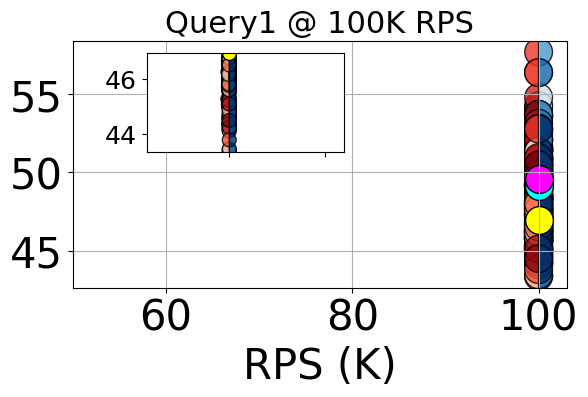

In [216]:
rate = 100000
ratek = rate/1000.0
dfo = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'ondemand')]
dfpo = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'powersave')]
dfpe = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'performance')]
dfs = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'schedutil')]
dfu = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'userspace')]
graph(rate/1000, dfo, dfu, dfpo, dfpe, dfs, 50, int(ratek+(ratek*0.03)), metric='ratek')
plt.savefig("query1itrdvfs100K.pdf", bbox_inches='tight')


314
199.99582532552083
189.43057503744552
200.0
200.0
72.44
59.381 84.439
175.0 202.0
61.21
199.99582532552083
189.43057503744552
200.0
200.0
72.44


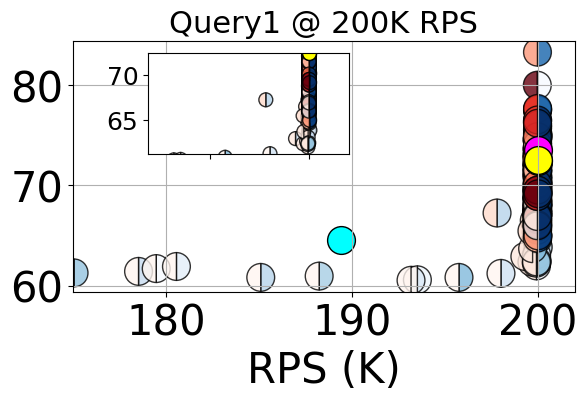

In [217]:
rate = 200000
ratek = rate/1000.0
dfo = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'ondemand')]
dfpo = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'powersave')]
dfpe = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'performance')]
dfs = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'schedutil')]
dfu = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'userspace')]
graph(rate/1000, dfo, dfu, dfpo, dfpe, dfs, 175, int(ratek+(ratek*0.01)), metric='ratek')
plt.savefig("query1itrdvfs200K.pdf", bbox_inches='tight')


315
300.0021088615544
191.61821418164487
299.990178199891
300.0459580133442
97.73
58.1555 104.67450000000001
160.0 309.0
79.99
300.0021088615544
191.61821418164487
299.990178199891
300.0459580133442
97.73


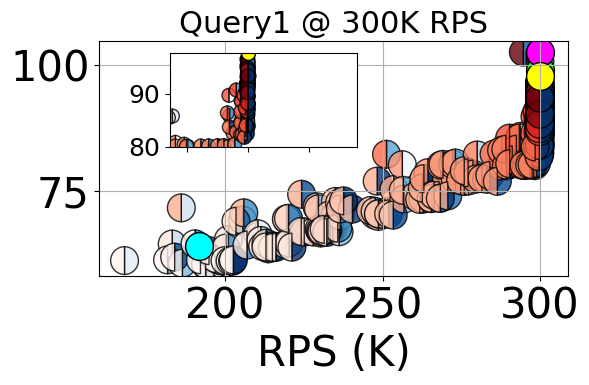

In [218]:
rate = 300000
ratek = rate/1000.0
dfo = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'ondemand')]
dfpo = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'powersave')]
dfpe = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'performance')]
dfs = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'schedutil')]
dfu = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'userspace')]
graph(rate/1000, dfo, dfu, dfpo, dfpe, dfs, 160, int(ratek+(ratek*0.03)), metric='ratek')
plt.savefig("query1itrdvfs300K.pdf", bbox_inches='tight')


315
399.47797882175314
163.780616064134
390.8711809334151
394.26681519948255
112.74
57.0035 122.7065
150.0 412.0
102.97
399.47797882175314
163.780616064134
390.8711809334151
394.26681519948255
112.74


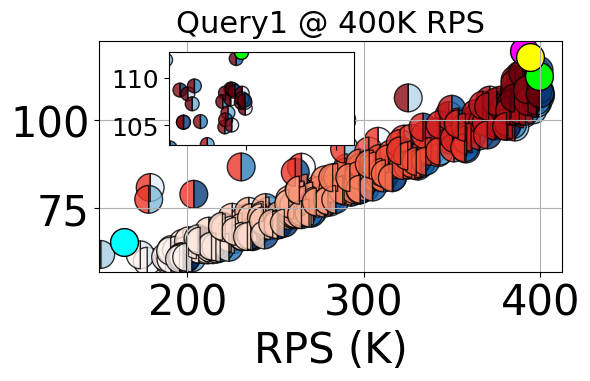

In [219]:
rate = 400000
ratek = rate/1000.0
dfo = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'ondemand')]
dfpo = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'powersave')]
dfpe = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'performance')]
dfs = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'schedutil')]
dfu = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'userspace')]
graph(rate/1000, dfo, dfu, dfpo, dfpe, dfs, 150, int(ratek+(ratek*0.03)), metric='ratek')
plt.savefig("query1itrdvfs400K.pdf", bbox_inches='tight')


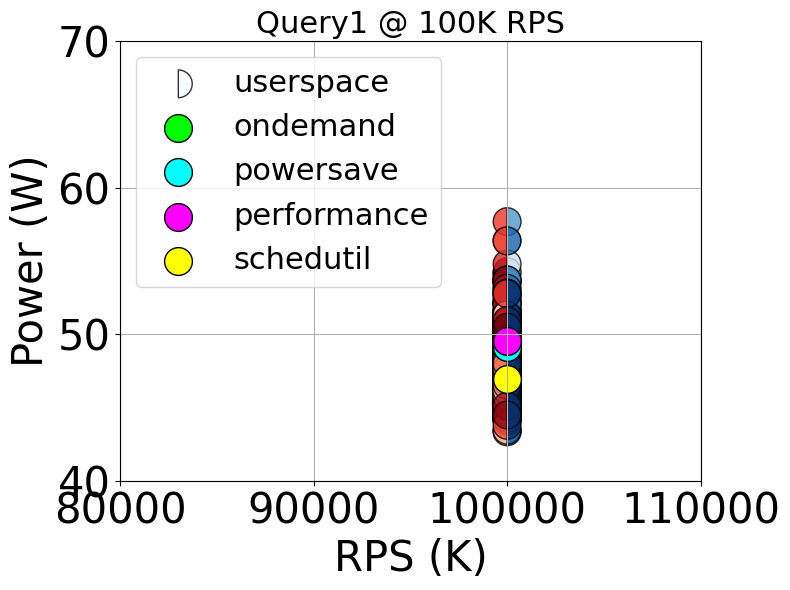

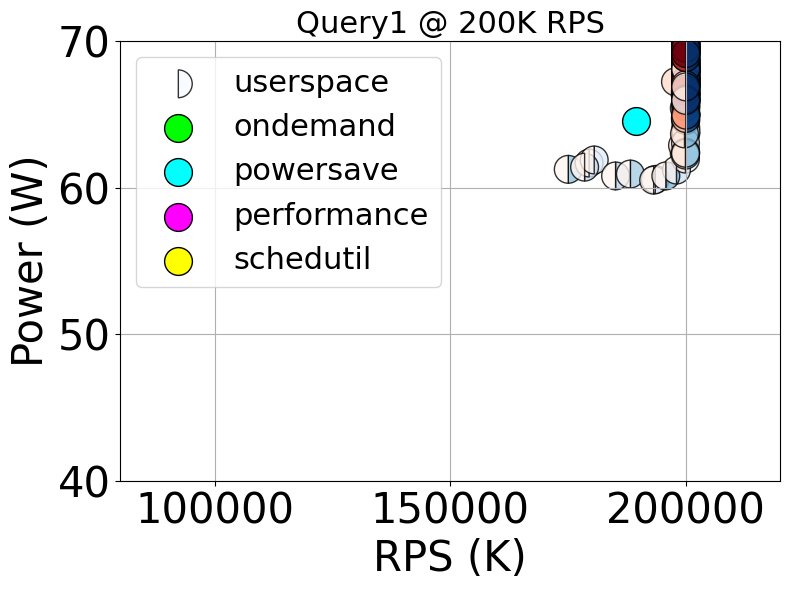

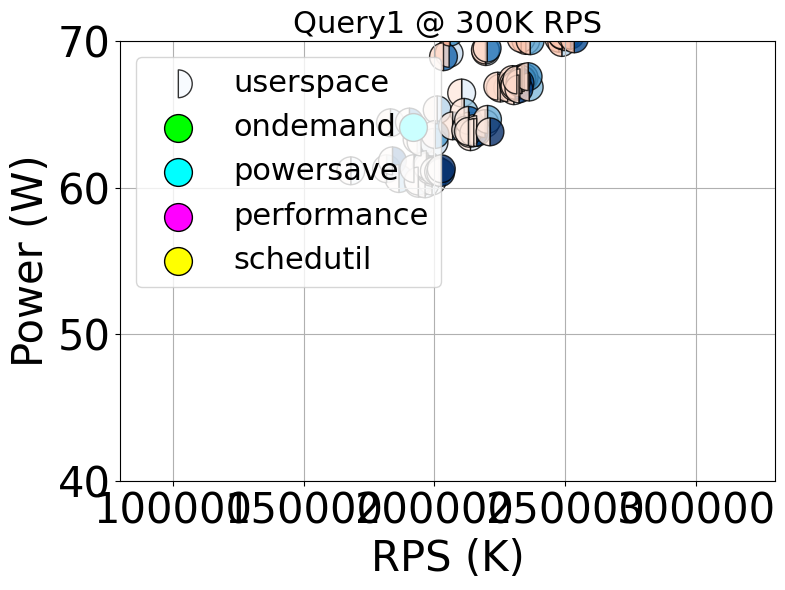

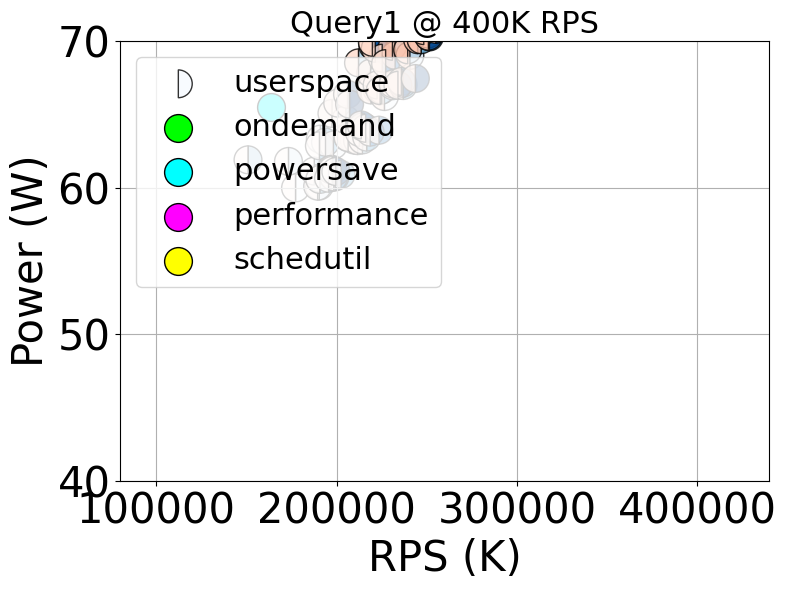

In [15]:
for rate in [100000, 200000, 300000, 400000]:
    dfo = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'ondemand')]
    dfpo = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'powersave')]
    dfpe = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'performance')]
    dfs = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'schedutil')]
    dfu = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'userspace')]
    graph(rate/1000, dfo, dfu, dfpo, dfpe, dfs, 80000, int(rate+(rate*0.10)), metric='SourcenumRecordsOutPerSecond_avg')

In [21]:
df_comb = pd.read_csv("mapper8/combined.csv")
df_comb["SourcenumRecordsOutPerSecond_percent"] = 1.0-(df_comb['SourcenumRecordsOutPerSecond_avg']/df_comb['rate'])
df_comb["SourcenumRecordsOutPerSecond_percent"] = df_comb["SourcenumRecordsOutPerSecond_percent"].apply(lambda x: 0.0 if x <= 0.0 else x)

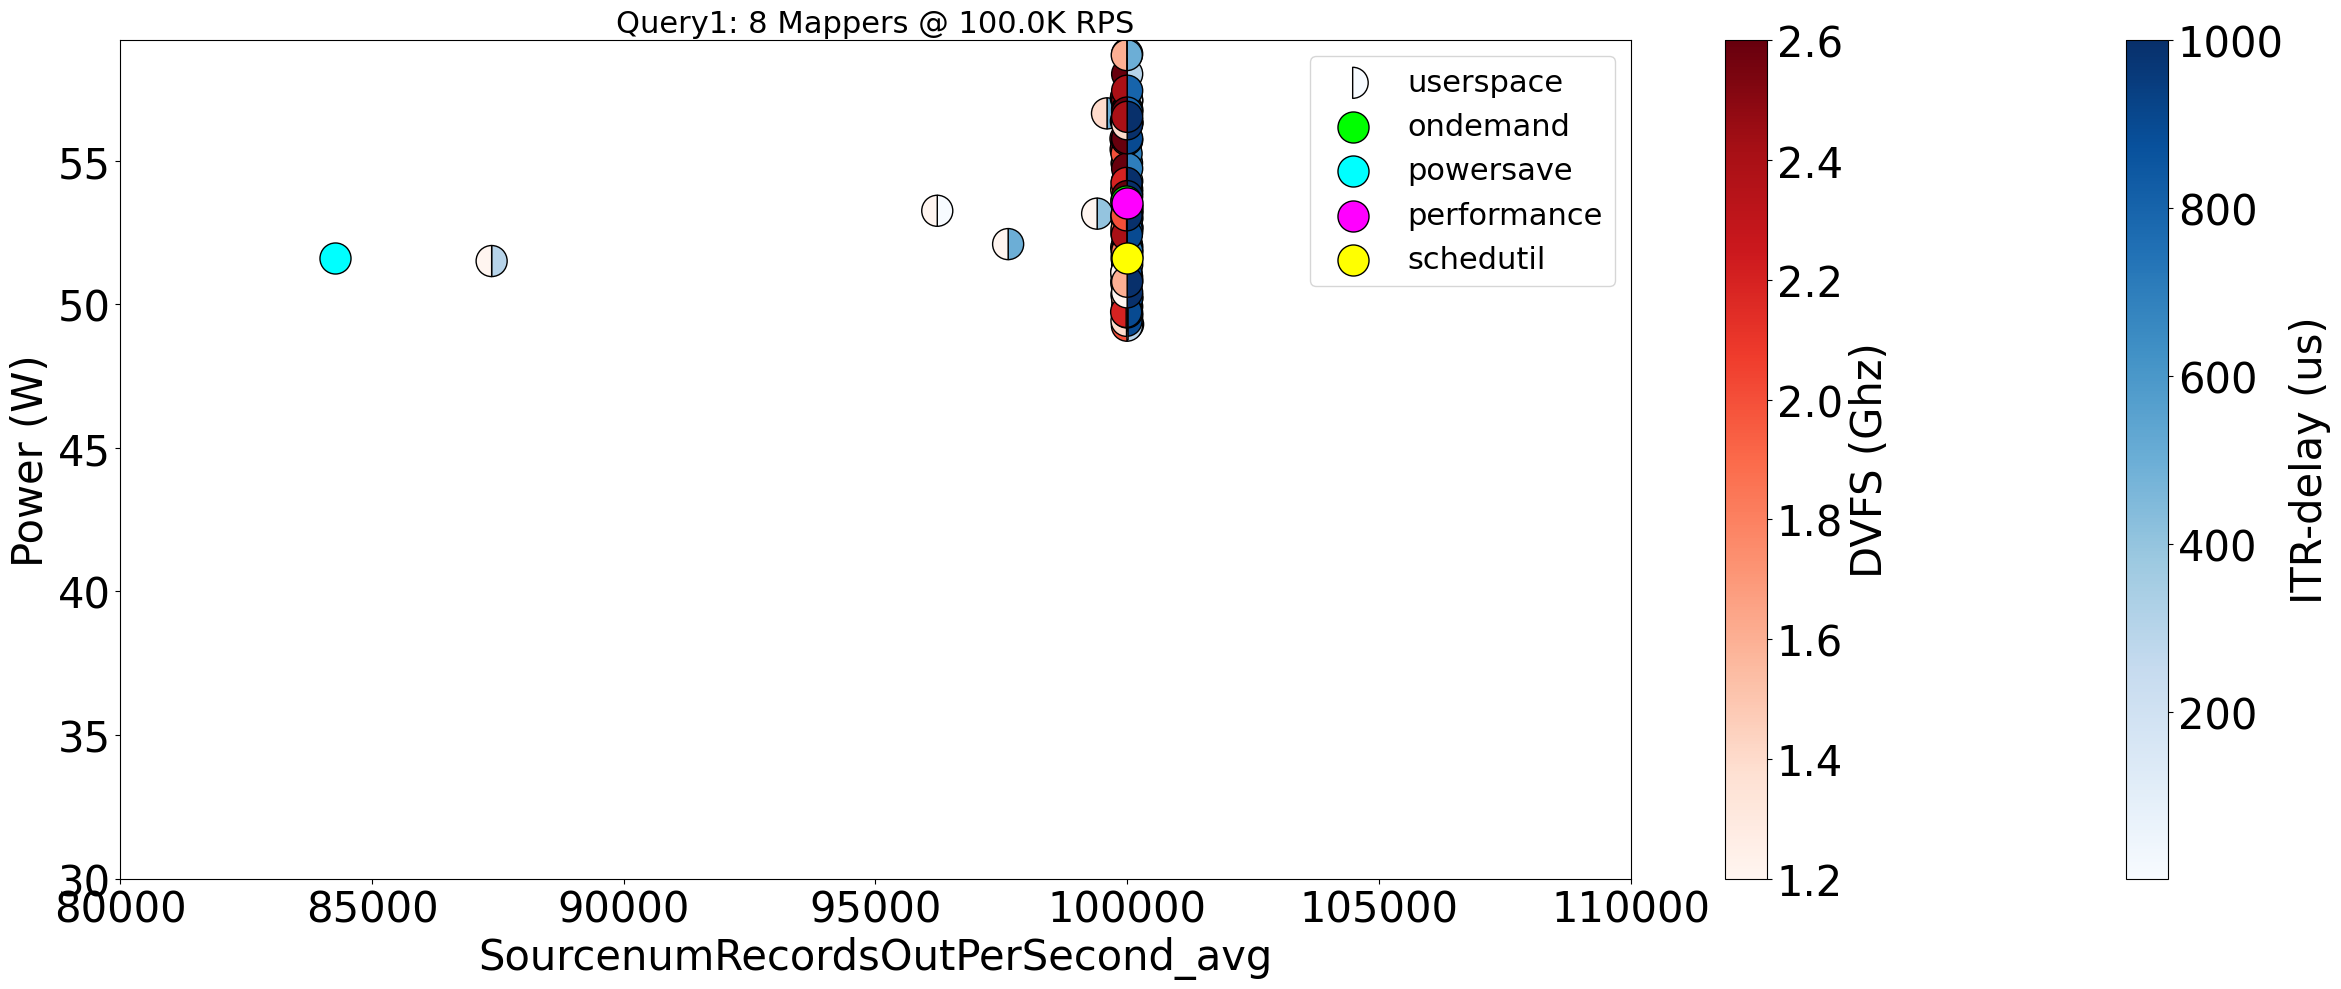

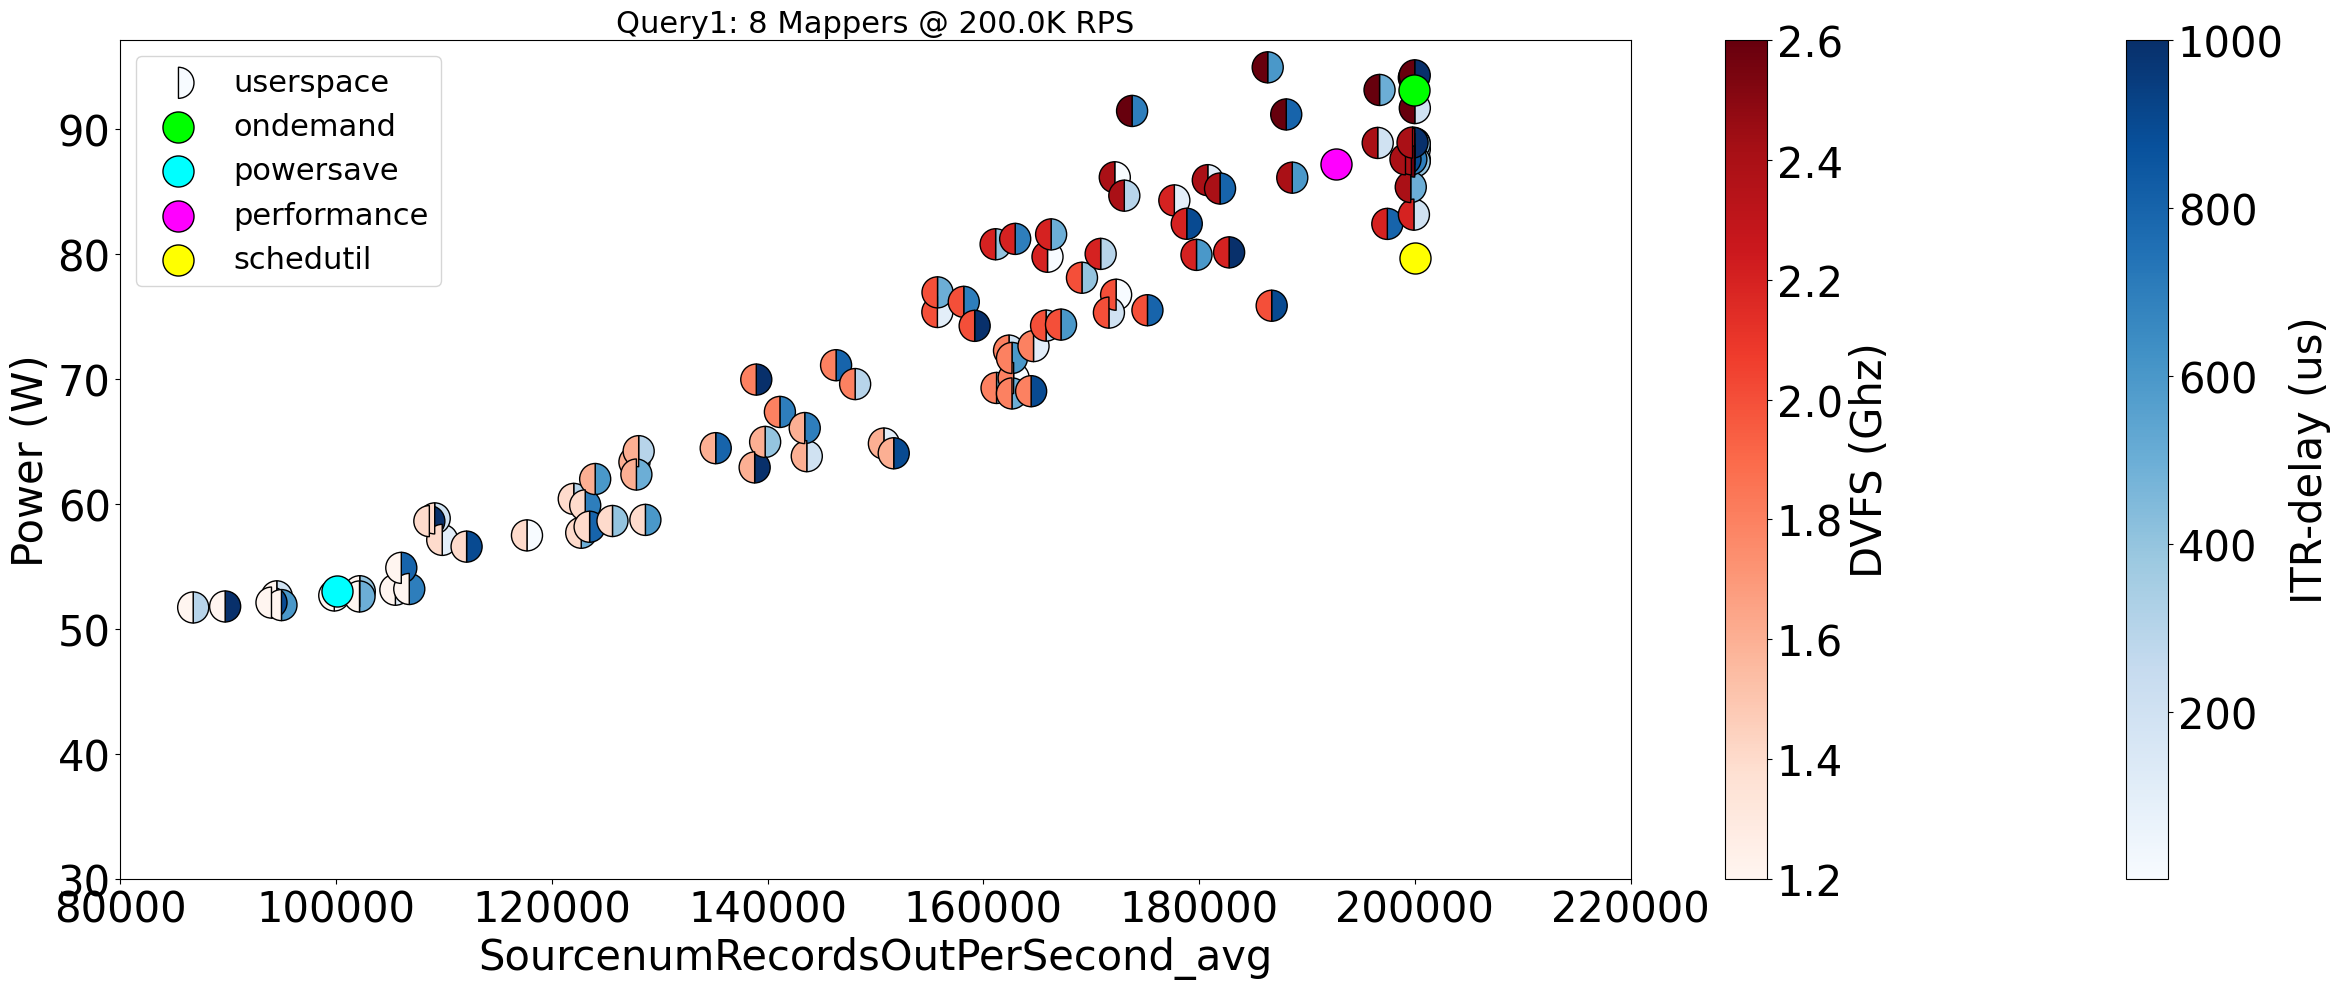

In [23]:
for rate in [100000, 200000]:
    dfo = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'ondemand')]
    dfpo = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'powersave')]
    dfpe = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'performance')]
    dfs = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'schedutil')]
    dfu = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'userspace')]
    graph(rate/1000, dfo, dfu, dfpo, dfpe, dfs, 80000, int(rate+(rate*0.10)), metric='SourcenumRecordsOutPerSecond_avg') 